## Familiarization with the data

Imports and the libraries I will be using and data reading:

`“timeStamp”`: is the date time of the mesure.

`“Idflowmeter”`: is the ID of the meter The peculiar series of water measures for two sensor IDs are yet to be explained by Braila.

`“Tot1”`: is the water flow in m3

`“Tot2”`: is the water flow in m3. The difference between Tot1 and Tot2 are yet to be explained by Braila.

`“Analog2”`: is the water pressure of the measure point. The unit is probably Pascal, however not yet confirmed by Braila.

In [1]:
import math
import pandas as pandas
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

data = pandas.read_json("../data/water_loss_data_set_1.json")

Preparing data:
1. **Removed values that make no sense -> "0000-00-00 00:00:00", "2000-01-01 00:00:00"**
2. **Removed rows without tot1 data or without analog2 data**
3. **Formated column timeStamp to dateTime format**
4. **Floored minutes to the nearest hour**
5. **Divided data depending on the id of the measuring station**
6. **Prepared the data for plotting**

In [2]:
# removing false values
data = data[(data.timeStamp != "0000-00-00 00:00:00" ) & (data.timeStamp != "2000-01-01 00:00:00")]

"""
Missing data in columns: 
tot1: 5086 
tot2: 100635 
analog2: 25

Removing data which is zero, be careful for 'analog2' only 25 values have zero. 
This could be values when some work was done on the pipes so the unhooked them -> pressure 0 ?
""" 
data = data[(data.tot1 != 0 ) & (data.analog2 != 0)]

data["timeStamp"] =  pandas.to_datetime(data["timeStamp"], format="%Y-%m-%d %H:%M:%S")
# flooring to the nearest hour and grouping by hour
data["timeStamp"] = data["timeStamp"].dt.floor('h')
data.sort_values("timeStamp")


# splitting the data by measuring station
data_249 = data[data['idflowmeter'] == "MAG8000_024905H318"]
data_248 = data[data['idflowmeter'] == "MAG8000_024805H318"]
data_249

,timeStamp,idflowmeter,tot1,tot2,analog2
105,2018-11-23 08:00:00,MAG8000_024905H318,0.43,0.00,1.11
106,2018-11-23 08:00:00,MAG8000_024905H318,0.89,0.00,1.11
107,2018-11-23 08:00:00,MAG8000_024905H318,1.38,0.00,1.11
108,2018-11-23 08:00:00,MAG8000_024905H318,1.90,0.00,1.11
109,2018-11-23 08:00:00,MAG8000_024905H318,2.45,0.00,1.11
...,...,...,...,...,...
1395620,2020-04-01 08:00:00,MAG8000_024905H318,797188.56,-293.97,0.82
1395621,2020-04-01 08:00:00,MAG8000_024905H318,797192.50,-293.97,0.81
1395622,2020-04-01 08:00:00,MAG8000_024905H318,797195.06,-293.97,0.81
1395623,2020-04-01 08:00:00,MAG8000_024905H318,797197.62,-293.97,0.81


Processing...
1. find min and max of Tot1, Tot2 and Analog2.

Removed this timestamps from data  
`['0000-00-00 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00']`

In [3]:
data_249_by_hour = data_249.groupby("timeStamp").mean()
data_248_by_hour = data_248.groupby("timeStamp").mean()
data_249_by_hour

,tot1,tot2,analog2
timeStamp,,,
2018-11-23 08:00:00,1.410000,0.00,1.110000
2018-11-23 09:00:00,30.987273,0.00,1.103409
2018-11-23 10:00:00,87.809457,0.00,1.099022
2018-11-23 11:00:00,182.008000,0.00,1.101000
2018-11-23 12:00:00,278.252500,0.00,0.960333
...,...,...,...
2020-04-01 04:00:00,796739.947500,-293.97,0.826000
2020-04-01 05:00:00,796816.443333,-293.97,0.824667
2020-04-01 06:00:00,796915.016000,-293.97,0.817167


In [4]:
data_248_by_hour

,tot1,tot2,analog2
timeStamp,,,
2018-12-11 12:00:00,161.873400,0.00,0.819200
2018-12-11 13:00:00,264.282667,0.00,0.820333
2018-12-11 14:00:00,371.478000,0.00,0.818333
2018-12-11 15:00:00,487.519333,0.00,0.813167
2018-12-11 16:00:00,601.331833,0.00,0.810833
...,...,...,...
2020-04-01 10:00:00,977299.898333,-4713.21,1.527333
2020-04-01 11:00:00,977333.727167,-4713.21,1.528500
2020-04-01 12:00:00,977369.184833,-4713.21,1.530500


In [6]:
timestamp_data_249 = data_249_by_hour.index.tolist()
timestamp_data_249 = [str(i) for i in timestamp_data_249]

timestamp_data_248 = data_248_by_hour.index.tolist()
timestamp_data_248 = [str(i) for i in timestamp_data_248]

y_axis_data = data.groupby("timeStamp").mean()[["analog2"]].to_numpy()
y_axis_data_249 = data_249_by_hour[["analog2"]].to_numpy()
y_axis_data_248 = data_248_by_hour[["analog2"]].to_numpy()

time :  
`['0000-00-00 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00', '2000-01-01 00:00:00', '2018-11-23 07:03:00', '2018-11-23 07:04:00', '2018-11-23 07:06:00', '2018-11-23 07:09:00', '2018-11-23 07:10:00']`
tot1 :  
`[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]`

Max date: `2020-04-01 14:09:00`  
Min date: `0000-00-00 00:00:00` 
Median date: `2019-08-02 02:27:00` 

Max date: `2020-04-01 14:09:00` 
Min date: `0000-00-00 00:00:00` 
Median date: `2019-08-02 02:27:00`


False values:  `[['0000-00-00 00:00:00' -1.0]
 ['2000-01-01 00:00:00' 0.0]
 ['2000-01-01 00:00:00' 0.0]
 ['2000-01-01 00:00:00' 0.0]
 ['2000-01-01 00:00:00' 0.0]
 ['2018-11-23 07:03:00' 0.0]
 ['2018-11-23 07:04:00' 0.0]
 ['2018-11-23 07:06:00' 0.0]
 ['2018-11-23 07:09:00' 0.0]
 ['2018-11-23 07:10:00' 0.0]]`

Checking which data is missing.   
"tot2" attribute contains negative values mostly negative values!! Other do not...

In [7]:
"""
DATA_SIZE = 1390649 
len_tot1 = len(data[(data['tot1'] != 0)])
len_tot2 = len(data[(data['tot2'] != 0)])
len_analog = len(data[(data['analog2'] != 0)])

print("Missing data in columns: ")
print("tot1:", (DATA_SIZE - len_tot1), "\ntot2:", (DATA_SIZE - len_tot2), "\nanalog2:", (DATA_SIZE- len_analog))
""";

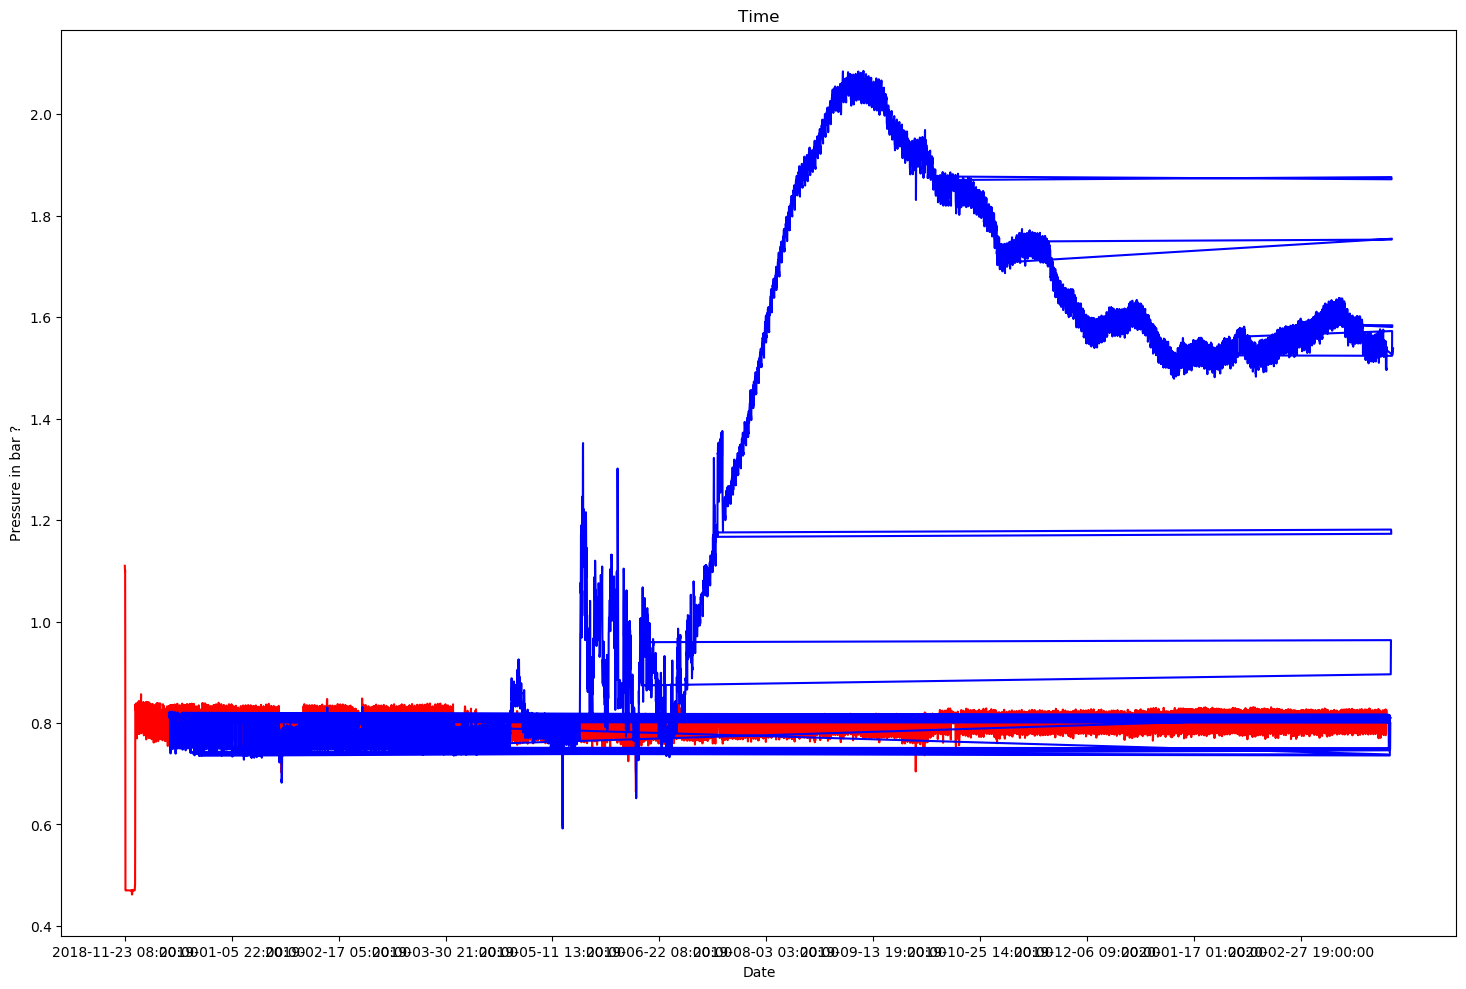

In [8]:
fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
plt.plot(timestamp_data_249, y_axis_data_249, color="red")
plt.plot(timestamp_data_248, y_axis_data_248, color="blue")

plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.xticks([i for i in range(0,len(y_axis_data), 1000)])
plt.rc('xtick',labelsize=8)
plt.title('Time')
#plt.savefig('test.png')
plt.show()

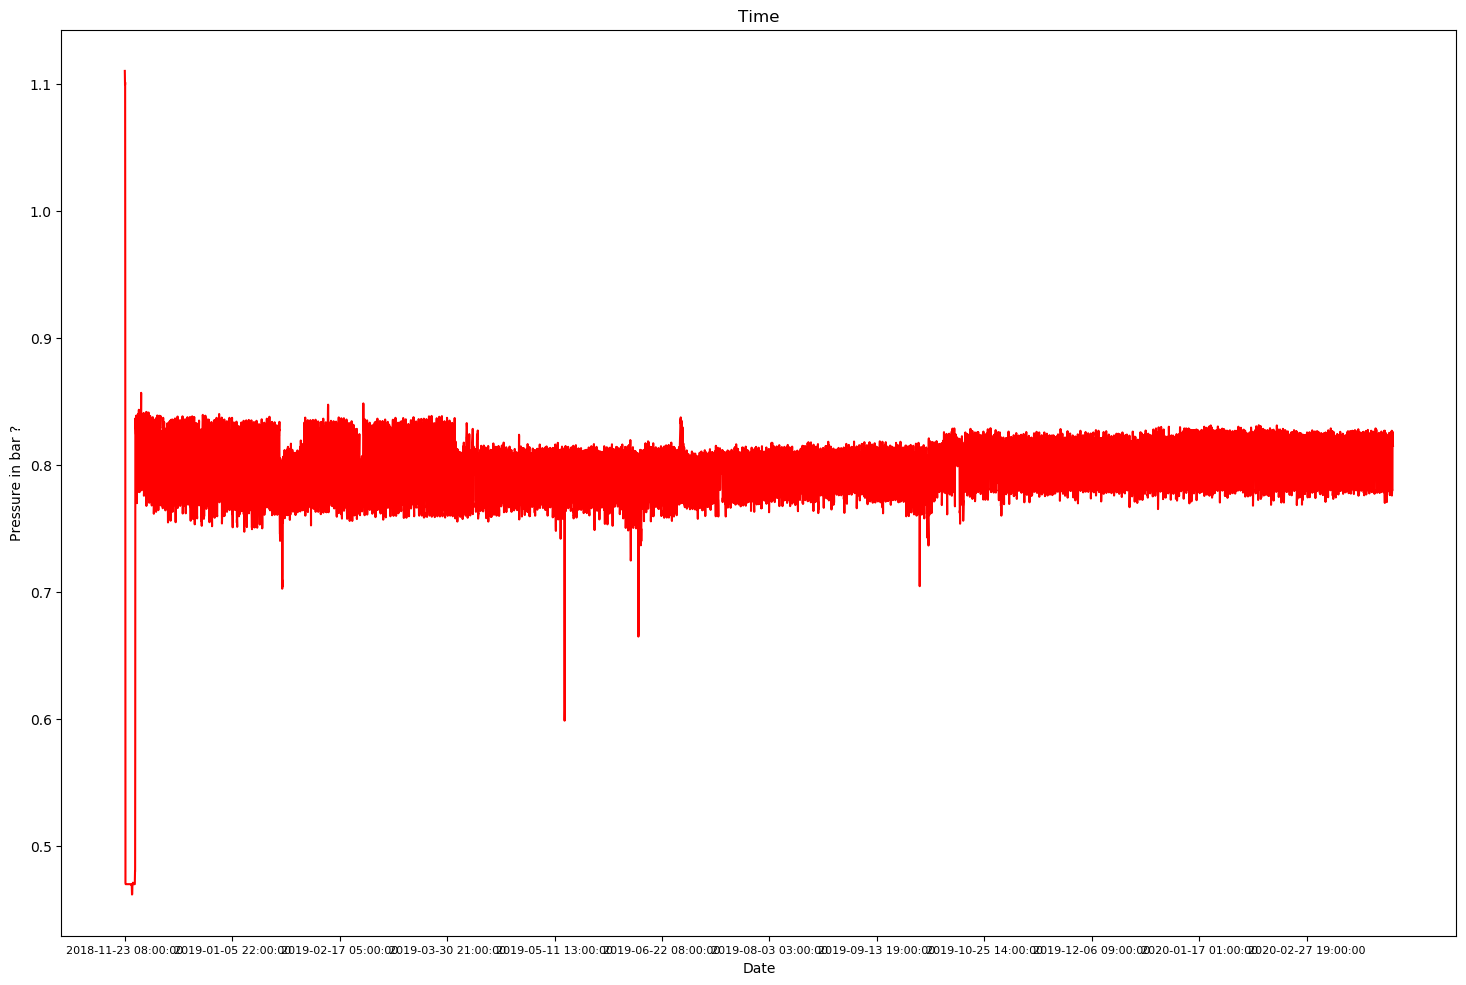

In [9]:
fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
plt.plot(timestamp_data_249, y_axis_data_249, color="red")

plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.xticks([i for i in range(0,len(y_axis_data), 1000)])
plt.rc('xtick',labelsize=8)
plt.title('Time')
# plt.savefig('red_id.png')
plt.show()

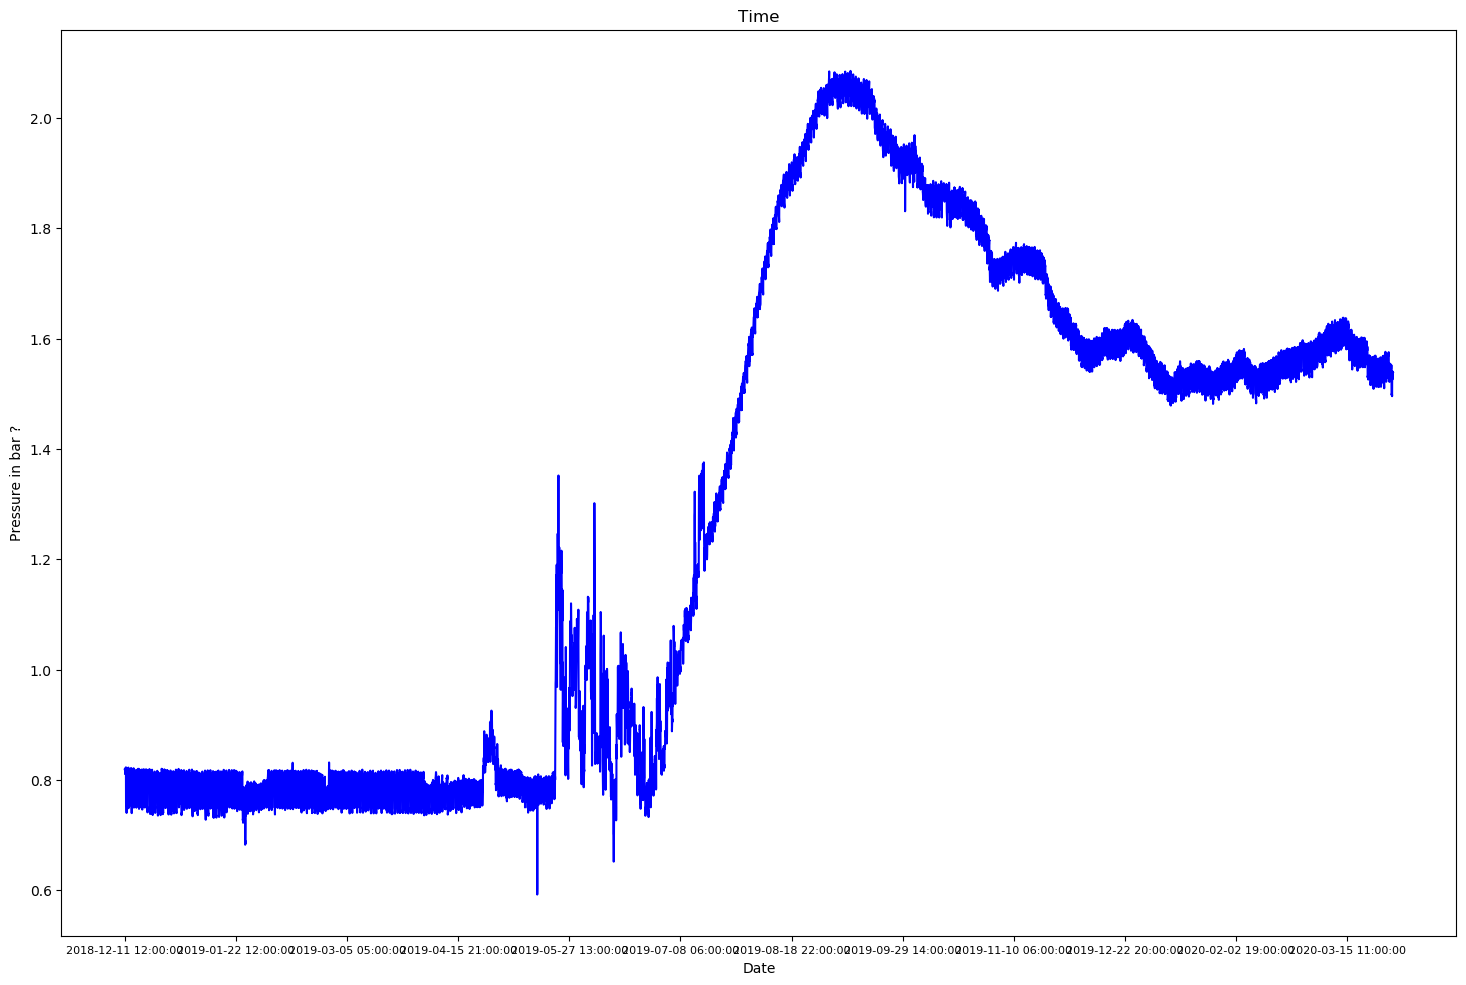

In [10]:
fig = plt.figure(figsize=(18, 12), dpi= 100, facecolor='w')
plt.plot(timestamp_data_248, y_axis_data_248, color="blue")

plt.ylabel('Pressure in bar ?')
plt.xlabel('Date')
plt.xticks([i for i in range(0,len(y_axis_data), 1000)])
plt.rc('xtick',labelsize=8)
plt.title('Time')
# plt.savefig('blue_id.png')
plt.show()